Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
import pathlib

In [ ]:
path = pathlib.Path()

In [90]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [101]:
IMG_DIR = './daisy'
def read_images(directory):
  for img in glob.glob(directory+'/+.jpg'):
    image = cv2.imread(img)
    resized_img = cv2.resize(image/255.0,(150,150))
    yield resized_img
resized_imgs = np.array(list(read_images(IMG_DIR)))

In [102]:
resized_imgs

array([], dtype=float64)

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
import os

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers,models,optimizers,utils
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [105]:
import glob
import cv2
import numpy as np
import pandas as pd
from skimage.transform import resize

In [115]:
folders = ['daisy','dandelion','rose','sunflower','tulip']
x = [] # Feature data set that holds the images
y = [] # Target data set that holds the label
## Loop through every folder
for folder in folders:
    path = '/content/drive/MyDrive/flowers/'+folder+'/*.jpg'
    files = glob.glob(path) # Get only .jpg image file location
    
# Loop through every image file in the specific folder
for myfile in files:
    image = cv2.imread(myfile) ## Read file
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = resize(image,(150,150)) ## Resize image to be 32 x 32 (RGB)
    x.append(image) # Append the image to the list
    y.append(folder) # Append the image label to the list

In [116]:
##### Slitting the data to be 20% test and 80% training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [117]:
x_train[0]

array([[[0.63587843, 0.57548627, 0.59959608],
        [0.55633333, 0.49544706, 0.52638431],
        [0.59401961, 0.52854902, 0.56533333],
        ...,
        [0.93947059, 0.9455098 , 0.95470588],
        [0.97003137, 0.9809451 , 0.989     ],
        [0.97251373, 0.97894118, 0.9924902 ]],

       [[0.67179216, 0.60640784, 0.62686667],
        [0.69186275, 0.62990196, 0.66583137],
        [0.62994118, 0.56903922, 0.61192157],
        ...,
        [0.96823529, 0.98711765, 0.99180392],
        [0.94353333, 0.95985882, 0.98961961],
        [0.97576863, 0.99108627, 0.99472549]],

       [[0.65633333, 0.6014902 , 0.57052941],
        [0.64168627, 0.58962745, 0.5737451 ],
        [0.6722549 , 0.63117647, 0.63343137],
        ...,
        [0.96019608, 0.9677451 , 0.97803922],
        [0.94472549, 0.95078431, 0.96790196],
        [0.95264706, 0.95852941, 0.97427451]],

       ...,

       [[0.58847059, 0.61586275, 0.65507843],
        [0.59607843, 0.6217451 , 0.66096078],
        [0.59813725, 0

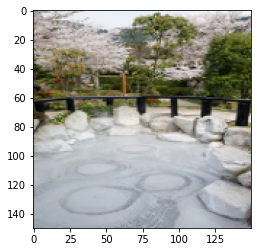

In [118]:
img = plt.imshow(x_train[0])

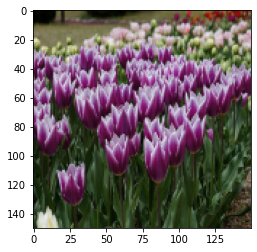

In [119]:
img = plt.imshow(x_train[12])

In [120]:
y_train[0]

'tulip'

In [121]:
x_train[0].shape

(150, 150, 3)

# Convert all the labels into numerical values

In [122]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

# Convert the labels into a set of 5 numbers to input into the neural network

In [123]:
y_train_one_hot = utils.to_categorical(y_train)
y_test_one_hot = utils.to_categorical(y_test)

In [124]:
print(y_train_one_hot)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [125]:
x_train = np.array(x_train)/255
x_test = np.array(x_test)/255

# Build a Model

In [126]:
model = models.Sequential([layers.Flatten(),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(32,activation='relu'),
                           layers.Dense(16,activation='relu'),
                           layers.Dense(8,activation='relu'),
                           layers.Dense(1,activation='softmax')])
#model = models.Sequential()
#model.add(layers.Dense(64,activation='relu',input_shape = (x_train.shape[1],)))
#model.add(layers.Dense(32,activation='relu'))
#model.add(layers.Dense(5,activation='softmax'))

In [127]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [128]:
model.fit(x_train,y_train_one_hot,epochs=50,batch_size=100,validation_split=0.3)

Epoch 1/50
6/6 [==============================] - 2s 160ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
6/6 [==============================] - 1s 96ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
6/6 [==============================] - 1s 99ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
6/6 [==============================] - 1s 95ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
6/6 [==============================] - 1s 97ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 1s 97ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 1s 102ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0

In [129]:
loss, acc = model.evaluate(x_test,y_test_one_hot)

7/7 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [130]:
model.predict(x_train)[0]

array([1.], dtype=float32)

In [131]:
y_train_one_hot[0]

array([1.], dtype=float32)